In [ ]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix


In [ ]:
from google.colab import files 
files.upload()

Saving diabetes (1).csv to diabetes (1).csv


{'diabetes (1).csv': b'Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome\r\n6,148,72,35,0,33.6,0.627,50,1\r\n1,85,66,29,0,26.6,0.351,31,0\r\n8,183,64,0,0,23.3,0.672,32,1\r\n1,89,66,23,94,28.1,0.167,21,0\r\n0,137,40,35,168,43.1,2.288,33,1\r\n5,116,74,0,0,25.6,0.201,30,0\r\n3,78,50,32,88,31,0.248,26,1\r\n10,115,0,0,0,35.3,0.134,29,0\r\n2,197,70,45,543,30.5,0.158,53,1\r\n8,125,96,0,0,0,0.232,54,1\r\n4,110,92,0,0,37.6,0.191,30,0\r\n10,168,74,0,0,38,0.537,34,1\r\n10,139,80,0,0,27.1,1.441,57,0\r\n1,189,60,23,846,30.1,0.398,59,1\r\n5,166,72,19,175,25.8,0.587,51,1\r\n7,100,0,0,0,30,0.484,32,1\r\n0,118,84,47,230,45.8,0.551,31,1\r\n7,107,74,0,0,29.6,0.254,31,1\r\n1,103,30,38,83,43.3,0.183,33,0\r\n1,115,70,30,96,34.6,0.529,32,1\r\n3,126,88,41,235,39.3,0.704,27,0\r\n8,99,84,0,0,35.4,0.388,50,0\r\n7,196,90,0,0,39.8,0.451,41,1\r\n9,119,80,35,0,29,0.263,29,1\r\n11,143,94,33,146,36.6,0.254,51,1\r\n10,125,70,26,115,31.1,0.205,41,1\r\n7,147,76,0,0,39.4,0.25

In [ ]:
df = pd.read_csv('diabetes.csv')

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df[df.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


Checking Statistical Data Of DataFrame

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

Computing the correlation matrix

In [ ]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [ ]:
print("Number of samples for Outcome 0 are : ",len(df[df['Outcome']==0]))
print("Number of samples for Outcome 1 are : ",len(df[df['Outcome']==1]))

Number of samples for Outcome 0 are :  500
Number of samples for Outcome 1 are :  268


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


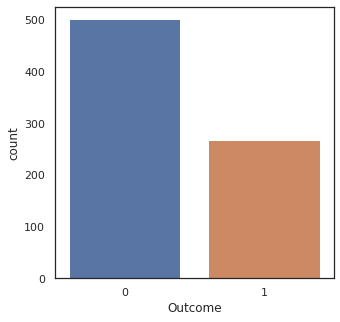

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(df["Outcome"])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1e4afd8a90>,
      dtype=object)

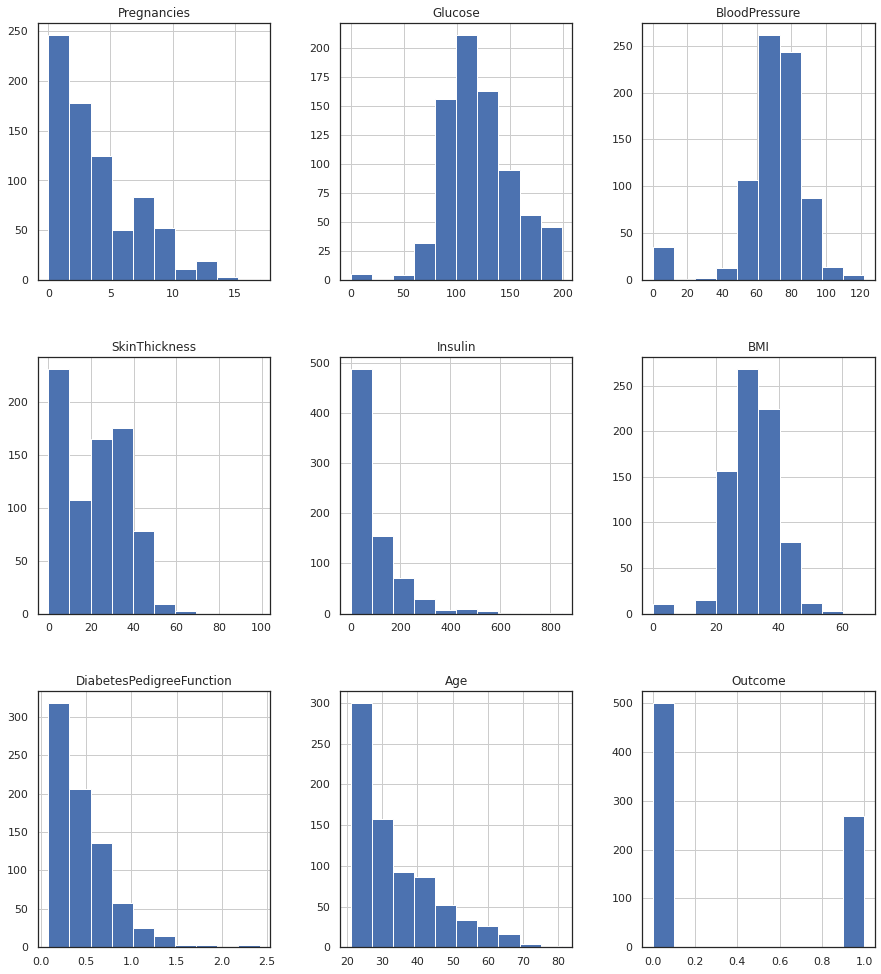

In [ ]:
df.hist()

#Distplot For Various Features

In [ ]:
columns=df.columns
columns=list(columns)
columns.pop()
print("Column names except for the target column are :",columns)

#Graphs to be plotted with these colors
colours=['b','c','g','k','m','r','y','b']
print()
print('Colors for the graphs are :',colours)

Column names except for the target column are : ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

Colors for the graphs are : ['b', 'c', 'g', 'k', 'm', 'r', 'y', 'b']


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103

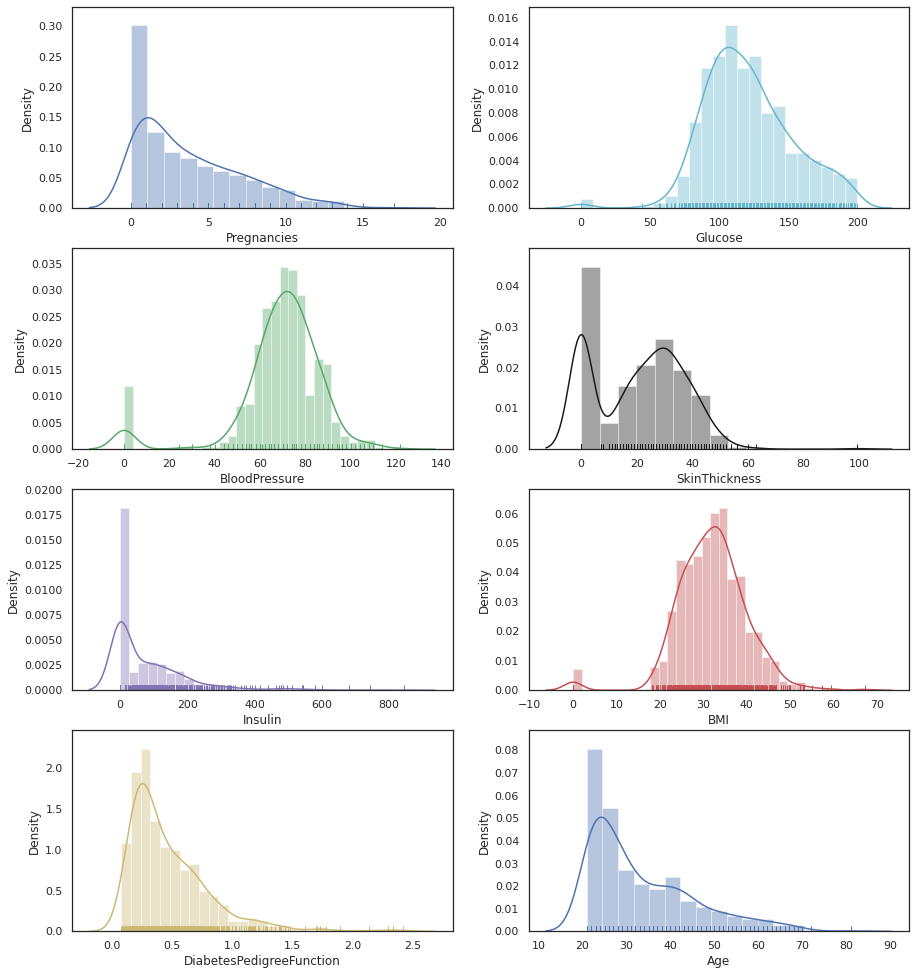

In [ ]:
sns.set(rc={'figure.figsize':(15,17)})
sns.set_style(style='white')
for i in range(len(columns)):
    
    plt.subplot(4,2,i+1)
    sns.distplot(df[columns[i]], hist=True, rug=True, color=colours[i])

#ScatterPlot Of All Attributes Against Each Other

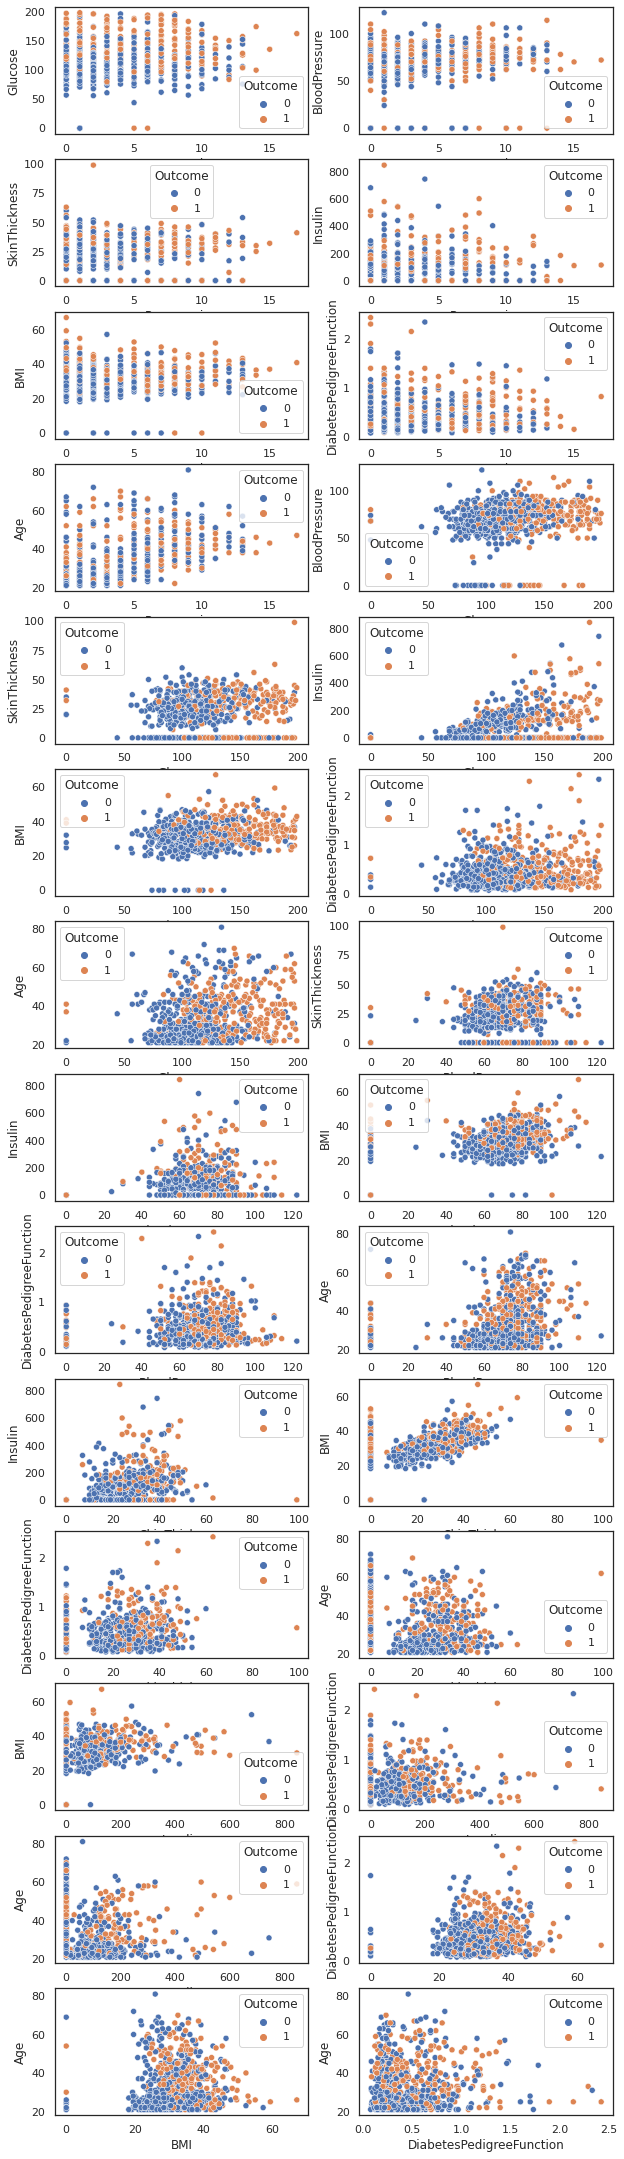

In [ ]:
sns.set(rc={'figure.figsize':(10,50)})
j=1

sns.set_style(style='white')
for i in range(len(columns)):
    for k in range(i,len(columns)):
        try:
            if i==k:
                continue
            plt.subplot(18,2,j)
            sns.scatterplot(x=df[columns[i]],y=df[columns[k]],hue="Outcome",data=df)
            j=j+1
        except:
            break

#Correlations of each features in dataset

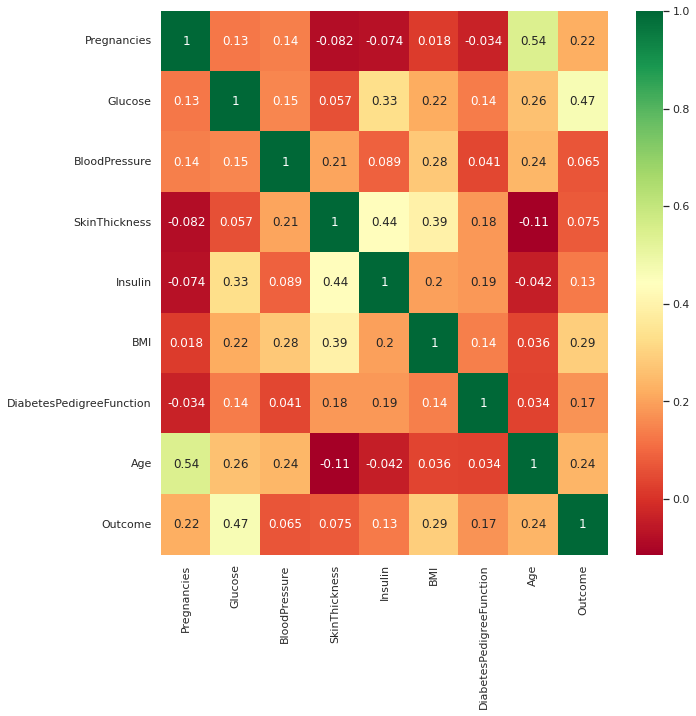

In [ ]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

#KDEplot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


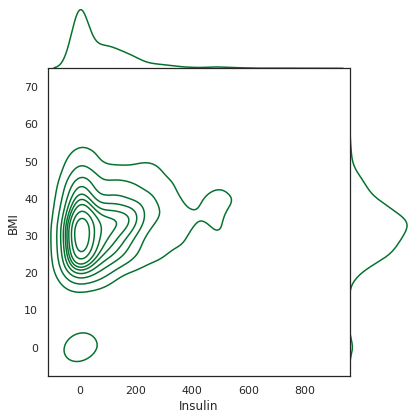

In [ ]:
with sns.axes_style("white"):
    sns.set_palette("BuGn_r")
    g2 = sns.jointplot("Insulin", "BMI", data=df,
                kind="kde", space=0)

In [ ]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1:]
x,y

(     Pregnancies  Glucose  BloodPressure  ...   BMI  DiabetesPedigreeFunction  Age
 0              6      148             72  ...  33.6                     0.627   50
 1              1       85             66  ...  26.6                     0.351   31
 2              8      183             64  ...  23.3                     0.672   32
 3              1       89             66  ...  28.1                     0.167   21
 4              0      137             40  ...  43.1                     2.288   33
 ..           ...      ...            ...  ...   ...                       ...  ...
 763           10      101             76  ...  32.9                     0.171   63
 764            2      122             70  ...  36.8                     0.340   27
 765            5      121             72  ...  26.2                     0.245   30
 766            1      126             60  ...  30.1                     0.349   47
 767            1       93             70  ...  30.4                     0.3

#Feature Importance

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
model = ExtraTreesClassifier()

In [ ]:
model.fit(x,y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


ExtraTreesClassifier()

In [ ]:
model.feature_importances_

array([0.11058068, 0.24361381, 0.09981262, 0.07847825, 0.07344109,
       0.13802037, 0.11889065, 0.13716253])

In [ ]:
top = pd.Series(model.feature_importances_,index = x.columns)
top

Pregnancies                 0.110581
Glucose                     0.243614
BloodPressure               0.099813
SkinThickness               0.078478
Insulin                     0.073441
BMI                         0.138020
DiabetesPedigreeFunction    0.118891
Age                         0.137163
dtype: float64

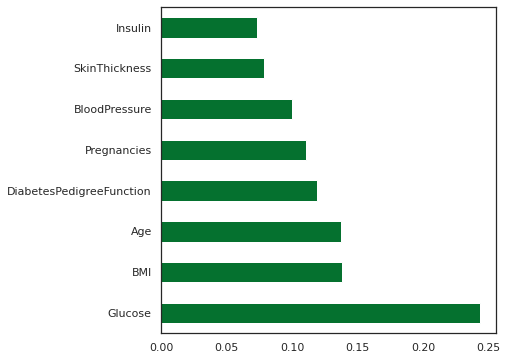

In [ ]:
plt.figure(figsize=(6,6))
top.nlargest(10).plot(kind = 'barh')

#feature Selection 

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
fit_feature = SelectKBest(score_func=f_classif,k='all')


In [ ]:
fit_feature.fit(x,y)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SelectKBest(k='all')

In [ ]:
score_col = pd.DataFrame(fit_feature.scores_,columns =['score value'])
score_col

,score value
0,39.670227
1,213.161752
2,3.256950
3,4.304381
4,13.281108
5,71.772072
6,23.871300
7,46.140611


In [ ]:
name_col = pd.DataFrame(x.columns)

In [ ]:
top_feature = pd.concat([name_col,score_col],axis=1)
top_feature

,0,score value
0,Pregnancies,39.670227
1,Glucose,213.161752
2,BloodPressure,3.256950
3,SkinThickness,4.304381
4,Insulin,13.281108
5,BMI,71.772072
6,DiabetesPedigreeFunction,23.871300
7,Age,46.140611


In [ ]:
top_feature.nlargest(6,'score value')

,0,score value
1,Glucose,213.161752
5,BMI,71.772072
7,Age,46.140611
0,Pregnancies,39.670227
6,DiabetesPedigreeFunction,23.871300
4,Insulin,13.281108


In [ ]:
x = df.drop(['BloodPressure'],axis=1)
x

,Pregnancies,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,35,0,33.6,0.627,50,1
1,1,85,29,0,26.6,0.351,31,0
2,8,183,0,0,23.3,0.672,32,1
3,1,89,23,94,28.1,0.167,21,0
4,0,137,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,10,101,48,180,32.9,0.171,63,0
764,2,122,27,0,36.8,0.340,27,0
765,5,121,23,112,26.2,0.245,30,0
766,1,126,0,0,30.1,0.349,47,1


#Split Data set

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = .40,random_state=1)

#Feature Scaling

In [ ]:
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [ ]:
xtrain,xtest

(array([[-0.50243383,  0.07035857, -0.06222025, ...,  0.12531227,
          1.23358343, -0.26663819],
        [-1.10118917, -0.2435594 ,  0.54782554, ...,  1.63346966,
         -0.90468825, -0.5164418 ],
        [-0.50243383, -0.40051839,  1.15787134, ...,  1.43327178,
          1.1429787 ,  1.73179063],
        ...,
        [ 2.79072054,  0.13314217,  1.05619704, ...,  1.52669746,
          0.35169737,  0.73257622],
        [ 0.09632151,  1.54577305,  0.14112835, ...,  1.55339051,
          0.03760096, -0.59970966],
        [ 1.59320986, -0.62026097,  0.34447695, ...,  0.12531227,
          0.5993503 ,  1.06564769]]),
 array([[ 0.99445452,  0.44706014,  0.24280265, ..., -0.795598  ,
          0.54498747,  1.48198702],
        [-0.8018115 ,  0.9179371 , -0.46891745, ..., -0.78225147,
         -0.86844636, -0.93278113],
        [ 0.69507685, -0.40051839, -0.46891745, ..., -0.92906325,
         -0.7869021 , -0.5164418 ],
        ...,
        [-0.50243383, -0.99696254, -0.06222025, ...,  

#LogisticRegression

In [ ]:
log =LogisticRegression()
log.fit(xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
log_test =log.score(xtest,ytest)
log_test

0.762987012987013

In [ ]:
y_pred_log = log.predict(xtest)
accuracy_score(ytest,y_pred_log)

0.762987012987013

In [ ]:
confusion_matrix(ytest,y_pred_log)

array([[176,  23],
       [ 50,  59]])

In [ ]:
print(classification_report(ytest,y_pred_log))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       199
           1       0.72      0.54      0.62       109

    accuracy                           0.76       308
   macro avg       0.75      0.71      0.72       308
weighted avg       0.76      0.76      0.75       308



#Gaussian Naive Bayes

In [ ]:
gnb = GaussianNB()
gnb.fit(xtest,ytest)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [ ]:
gnb_test = gnb.score(xtest,ytest)
gnb_test

0.7597402597402597

In [ ]:
y_pred_gnb = gnb.predict(xtest)
accuracy_score(ytest,y_pred_gnb)

0.7597402597402597

In [ ]:
confusion_matrix(ytest,y_pred_gnb)

array([[162,  37],
       [ 37,  72]])

In [ ]:
print(classification_report(ytest,y_pred_gnb))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       199
           1       0.66      0.66      0.66       109

    accuracy                           0.76       308
   macro avg       0.74      0.74      0.74       308
weighted avg       0.76      0.76      0.76       308



#Support Vector Machine

In [ ]:
svm = SVC()
svm.fit(xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [ ]:
svm_test = svm.score(xtest,ytest)
svm_test

0.7694805194805194

In [ ]:
y_pred_svm = svm.predict(xtest)
accuracy_score(ytest,y_pred_svm)

0.7694805194805194

In [ ]:
con_mat_svm =confusion_matrix(ytest,y_pred_svm)
con_mat_svm

array([[178,  21],
       [ 50,  59]])

In [ ]:
print(classification_report(ytest,y_pred_svm))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       199
           1       0.74      0.54      0.62       109

    accuracy                           0.77       308
   macro avg       0.76      0.72      0.73       308
weighted avg       0.77      0.77      0.76       308



#K Nearest Neighbours

In [ ]:
knnc = KNeighborsClassifier()
knnc.fit(xtest,ytest)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [ ]:
knnc_test = knnc.score(xtest,ytest)
knnc_test

0.788961038961039

In [ ]:
y_pred_knnc = knnc.predict(xtest)
accuracy_score(ytest,y_pred_knnc)

0.788961038961039

In [ ]:
con_mat_knnc = confusion_matrix(ytest,y_pred_knnc)
con_mat_knnc

array([[179,  20],
       [ 45,  64]])

In [ ]:
print(classification_report(ytest,y_pred_knnc))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       199
           1       0.76      0.59      0.66       109

    accuracy                           0.79       308
   macro avg       0.78      0.74      0.75       308
weighted avg       0.79      0.79      0.78       308



#RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier()

In [ ]:
rfc_test = rfc.score(xtest,ytest)
rfc_test

0.7662337662337663

In [ ]:
y_pred_rfc = rfc.predict(xtest)
accuracy_score(ytest,y_pred_rfc)

0.7662337662337663

In [ ]:
confusion_matrix(ytest,y_pred_rfc)

array([[173,  26],
       [ 46,  63]])

In [ ]:
print(classification_report(ytest,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       199
           1       0.71      0.58      0.64       109

    accuracy                           0.77       308
   macro avg       0.75      0.72      0.73       308
weighted avg       0.76      0.77      0.76       308



#Gradient Boosting

In [ ]:
xgb = GradientBoostingClassifier()
xgb.fit(xtest,ytest)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier()

In [ ]:
XGB_test = xgb.score(xtest,ytest)
XGB_test

0.974025974025974

In [ ]:
y_pred_xgb = xgb.predict(xtest)
accuracy_score(ytest,y_pred_xgb)

0.974025974025974

In [ ]:
 confusion_matrix(ytest,y_pred_xgb)

array([[196,   3],
       [  5, 104]])

In [ ]:
print(classification_report(ytest,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       199
           1       0.97      0.95      0.96       109

    accuracy                           0.97       308
   macro avg       0.97      0.97      0.97       308
weighted avg       0.97      0.97      0.97       308



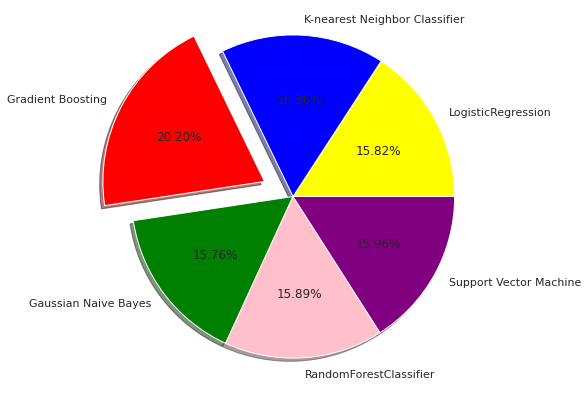

In [ ]:
plt.figure(figsize=(7,7))
import matplotlib.pyplot as plt
Algorithm=["LogisticRegression","K-nearest Neighbor Classifier","Gradient Boosting","Gaussian Naive Bayes","RandomForestClassifier","Support Vector Machine"]
algo=[log_test,knnc_test,XGB_test, gnb_test, rfc_test,svm_test]
plt.pie(algo,explode=[0,0,0.2,0,0,0],labels=Algorithm,shadow =True, autopct="%.2f%%",colors=['yellow','blue','red','green','pink','purple'])
plt.axis("equal")
plt.show()

In [ ]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression','SVM', 'KNN','Navie Bayes','Random Forest'],
    'Score' : [logistic_acc,svm_acc,knn_acc,nbc_acc,rf_acc]
})
models.sort_values(by = 'Score', ascending = False)
plt.figure(figsize = (6, 6))
sns.barplot(x = 'Score', y = 'Model', data = models)

plt.show()



#Ensemble

In [ ]:

log_clf = LogisticRegression()
rfc_clf = RandomForestClassifier()
gnb_clf = GaussianNB()
knnc_clf = KNeighborsClassifier()
xgb_clf = GradientBoostingClassifier()

voting_clf_hard = VotingClassifier(
    estimators=[('log', log_clf),('rfc', rfc_clf),('gnb', gnb_clf),('knnc', knnc_clf),('xgb', xgb_clf) ],
    voting='hard')

voting_clf_soft = VotingClassifier(
    estimators=[('log', log_clf),('rfc', rfc_clf), ('gnb', gnb_clf),('knnc', knnc_clf),('xgb', xgb_clf)],
    voting='soft')

In [ ]:
voting_clf_hard.fit(xtrain, ytrain)
voting_clf_soft.fit(xtrain, ytrain)

for clf in (log_clf,rfc_clf,gnb_clf,knnc_clf,xgb_clf, voting_clf_hard,voting_clf_soft):
    clf.fit(xtrain, ytrain)
    y_pred = clf.predict(xtest)
    print(clf.__class__.__name__, accuracy_score(ytest, y_pred))
    a_row = pd.Series([clf.__class__.__name__, accuracy_score(ytest, y_pred)])
    row_df = pd.DataFrame([a_row])
    df = pd.concat([row_df, df], ignore_index=False)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

LogisticRegression 0.762987012987013
RandomForestClassifier 0.775974025974026
GaussianNB 0.7272727272727273
KNeighborsClassifier 0.7532467532467533
GradientBoostingClassifier 0.75


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using

VotingClassifier 0.7727272727272727


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


VotingClassifier 0.7662337662337663
